<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI286 Computación Científica I</h1>
    <h1> Tarea N°2: Busqueda de ceros 1D</h1>
    <h3> [S]cientific [C]omputing [T]eam 2018</h3>
</center>

<p>
<center>_Marzo 2018_ </center>
</p>

In [188]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from matplotlib import gridspec
from ipywidgets import widgets,fixed
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

## Introducción

Las raices de una función $f(x)$ se definen como los valores $r$ donde función es $0$, es decir $f(r)=0$. En otras palabras, encontrar las raices de $f(x)$ es equivalente a resolver la ecuación:

$$
f(r) = 0.
$$

Uno de los tantos problemas que podemos resolver a través de búsqueda de ceros es un típico problema de física, el lanzamiento de un proyectil. El contexto es el siguiente: Tenemos un cañón que dispara un proyectil con ciertos parámetros iniciales (rapidez y ángulo). Sabiendo estos datos, la pregunta es ¿Cómo encontramos la trayectoria recorrida por el proyectil dado el contexto del problema?. Para esto, contamos con dos ecuaciones importantes:

\begin{align}
    x(t) &= v\,\cos(\theta)\,t \\
    y(t) &= v\,\sin(\theta)\,t - \frac{1}{2}\,g\,t^2
\end{align}

## Pregunta 1 [10 puntos]

a) Encuentre una expresión que acople estas dos ecuaciones y que esta dependa de la posición $x$, el ángulo $\theta$ y la velocidad $v$.

\begin{align}
    x &= v\,\cos(\theta)\,t \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(1)\\
    y &= v\,\sin(\theta)\,t - \frac{1}{2}\,g\,t^2 \,\,\,\,\,\,\,(2)\\
\end{align}

Despejamos t de la ecuación (1) en función de x, lo que queda:

\begin{align}
    t &= \frac{x}{v\,cos(\theta)} \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(3)\\
\end{align}

Reemplazando la ecuación (3) en la ecuación (2) tenemos que:

\begin{align}
    y\,(\theta,v,x) &= \frac{v_{0}\,\sin(\theta)\,x}{v_{0}\,\cos(\theta)} - \frac{g\,x^2}{2\,v_{0}^2\,cos^2(\theta)} \\
    y\,(\theta,v,x) &= x\,\tan(\theta) - \frac{g\,x^2}{2\,v_{0}^2\,\cos^2(\theta)} \, ,\,\,\,\, g = 9.8 \, \frac{m}{s^2} \,\,\,\,\,\,\,\,\,\,\,(4)\\
\end{align}

donde $\theta$, $v_{0}$ y x representan el ángulo inicial, la velocidad inicial y la distancia del eje x respectivamente.

b) Usando la ecuación anterior, encuentre las expresiones para encontrar la distancia $d$ recorrida en el eje x por el proyectil, el ángulo $\theta$ de lanzamiento y la velocidad necesaria para que el proyectil recorra la distancia $d$.

Cuando se alcanza una distancia d fija, asumiremos que y = 0 por lo cual despejando la ecuación (4) tenemos que:

\begin{align}
    0 &= d\,\tan(\theta) - \frac{g\,d^2}{2\,v_{0}^2\,cos^2(\theta)} \\
    d &= \frac{2\,v_{0}^2\,cos^2(\theta)\,\sin(\theta)}{\cos(\theta)\,g} \\
    d &= \frac{\sin(2\,\theta)\,v_{0}^2}{g} \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(5)\\
\end{align}

Y por lo cual, de la misma solución anterior tenemos que:

\begin{align}
    v_{0} &= \sqrt{\frac{g\,d}{\sin(2\,\theta)}} \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(6)\\
    \theta &= \frac{1}{2}\,\arcsin{\bigg(\frac{g\,d}{v_{0}^2}\bigg)} \,\,\,\,\,\,\,\,\,(7)\\
\end{align}
 


## Pregunta 2  [20 puntos]

Implemente los algoritmos de búsqueda de cero punto fijo, bisección y newton. Resuelva los siguientes casos:

   * Usando $d = 900, \theta = 20º$, encuentre el valor de $v$. 117,139
   * Usando $d = 900, v = 100$, encuentre el valor de $\theta$. 30.94
   * Usando $v = 100, \theta = 20º$, encuentre el valor de $d$. 655,906
   
a) Realice un gráfico por cada item donde se comparen el como se acerca cada método al valor real en cada iteración (usted define el número de iteraciones, pero recuerde que su resultado debe ser interpretable. Puede usar un bajo número de iteraciones, para que su resultado sea significativo dentro del contexto de búsqueda de ceros y los algoritmos involucrados). Muestre además, un gráfico de convergencia por cada item. Concluya.

In [189]:
#funciones:
from math import tan,cos,sin,sqrt,pi
import numpy as np

def fix_len(l1,l2,l3):
    maxi = max(len(l1),len(l2),len(l3))
    if(len(l1) != maxi):
        a = maxi-len(l1)
        valor = l1[-1]
        for i in range(a):
            l1.append(valor)
    if(len(l2) != maxi):
        a = maxi-len(l2)
        valor = l2[-1]
        for i in range(a):
            l2.append(valor)
    if(len(l3) != maxi):
        a = maxi-len(l3)
        valor = l3[-1]
        for i in range(a):
            l3.append(valor)
            
def minus_teorico(t,l1,l2,l3):
    for i in range(len(l1)):
        l1[i] = abs(l1[i]-t)
    for i in range(len(l2)):
        l2[i] = abs(l2[i]-t)
    for i in range(len(l3)):
        l3[i] = abs(l3[i]-t)


fv = lambda v: (900*np.tan(np.deg2rad(20)))-((9.8*(900**2))/(2*(v**2)*(np.cos(np.deg2rad(20))**2)))
ftheta = lambda theta: (900*(np.tan(np.deg2rad(theta))))-((9.8*(900**2))/(2*(100**2)*((np.cos(np.deg2rad(theta)))**2)))
fd = lambda d: (d*np.tan(np.deg2rad(20)))-((9.8*(d**2))/(2*(100**2)*(np.cos(np.deg2rad(20))**2)))

fvp = lambda v: (9.8*(900**2))/((v**3)*(np.cos(np.deg2rad(20))**2))
fthetap = lambda theta: (900/(np.cos(np.deg2rad(theta))**2))-(((np.sin(np.deg2rad(theta))))*9.8*(900**2)/((100)**2)*(np.cos(np.deg2rad(theta))**3))
fdp = lambda d: np.tan(np.deg2rad(20)) - ((9.8*d)/((100**2)*((np.cos(np.deg2rad(20)))**2)))    

gv = lambda v: v-(1.1124*(10**-7)*(v**3)*(900*np.tan(np.deg2rad(20))-((4.49479*(10**6))/(v**2))))
gtheta = lambda theta: theta - ((((np.cos(np.deg2rad(theta))**2)*(900*np.tan(np.deg2rad(theta))-396.9*(np.cos(np.deg2rad(theta))**(-2))))/(900-793.8*np.tan(np.deg2rad(theta)))))
gd = lambda d: d-((-0.000554912*(d**2) + d*np.tan(np.deg2rad(20)))/(-0.00110982*d + np.tan(np.deg2rad(20))))

# Bisection Method

In [190]:
from math import tan,cos,sin,sqrt,pi
import numpy as np


def bisect(f, a, b, tol=1e-8):
    lista_valor = []
    fa = f(a)
    fb = f(b)
    i = 0
    # Just checking if the sign is not negative => not root  necessarily 
    if np.sign(f(a)*f(b)) >= 0:
        print('f(a)f(b)<0 not satisfied!')
        return None
  
    #Printing the evolution of the computation of the root
    #print(' i |     a     |     c     |     b     |     fa    |     fc     |     fb     |   b-a')
    #print('----------------------------------------------------------------------------------------')
    
    while(b-a)/2 > tol:
        c = (a+b)/2.
        lista_valor.append(c)
        fc = f(c)
        #print('%2d | %.7f | %.7f | %.7f | %.7f | %.7f | %.7f | %.7f' %(i+1, a, c, b, fa, fc, fb, b-a))
        # Did we find the root?
        if fc == 0:
            print('f(c)==0')
            break
        elif np.sign(fa*fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
        
    xc = (a+b)/2.
    return xc,lista_valor
val_fv,bl_fv = bisect(fv,5,120)
val_ftheta,bl_ftheta = bisect(ftheta,20,40)
val_fd,bl_fd = bisect(fd,500,700)

# Fixed Point Iteration

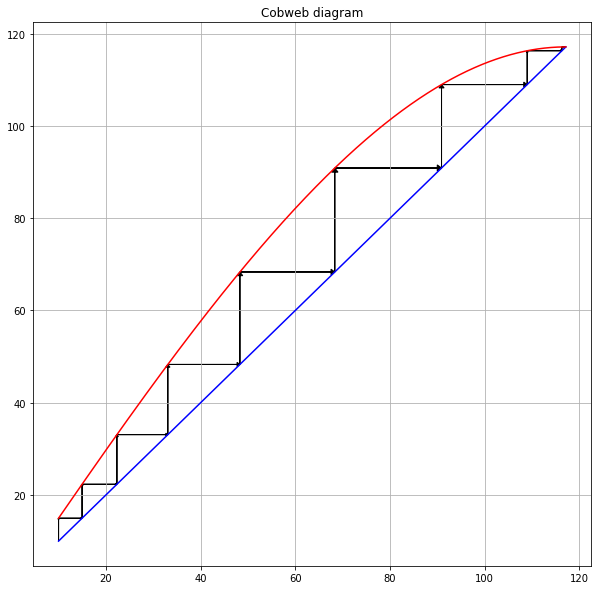

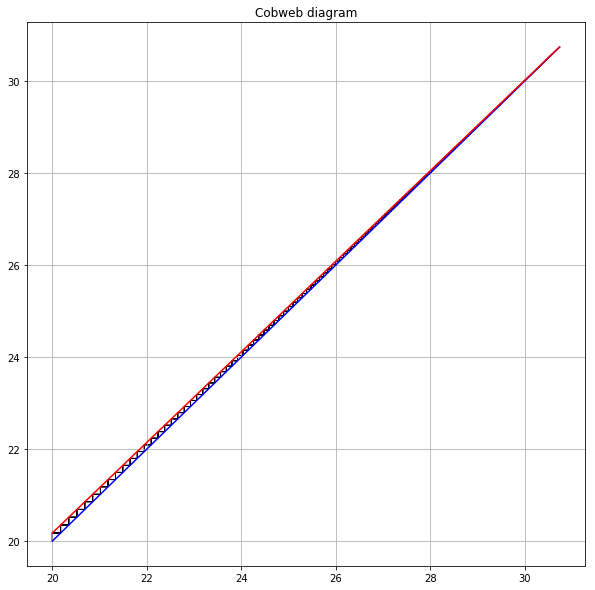

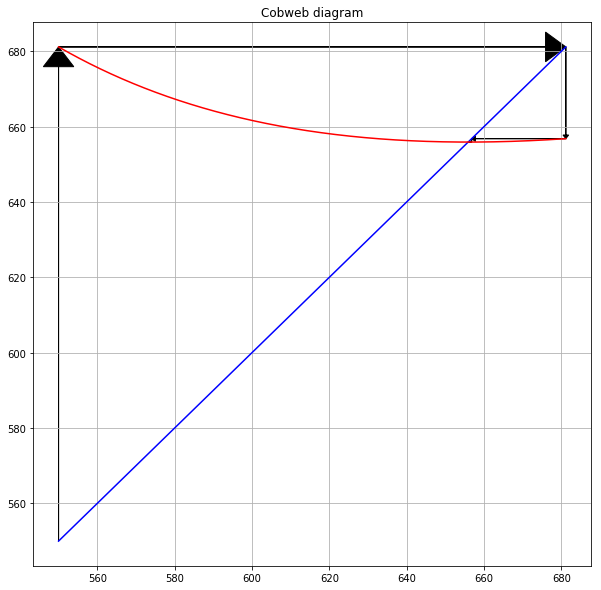

In [191]:
def cobweb(x,g=None):
    min_x = np.amin(x)
    max_x = np.amax(x)
    
    plt.figure(figsize=(10,10))
    ax = plt.axes()
    plt.plot(np.array([min_x,max_x]),np.array([min_x,max_x]),'b-')
    for i in np.arange(x.size-1):
        delta_x = x[i+1]-x[i]
        head_length =  np.abs(delta_x)*0.04
        arrow_length = delta_x-np.sign(delta_x)*head_length
        ax.arrow(x[i], x[i], 0, arrow_length, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
        ax.arrow(x[i], x[i+1], arrow_length, 0, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
    
    if g!=None:
        y = np.linspace(min_x,max_x,1000)
        plt.plot(y,g(y),'r')
    
    plt.title('Cobweb diagram')
    plt.grid(True)
    plt.show()

def fpi(g, x0, k, flag_cobweb=False):
    lista_error = []
    x = np.empty(k+1)
    x[0] = x0
    error_i = np.inf
    
    #print(' i |     x(i)     |    x(i+1)    ||x(i+1)-x(i)| | e_i/e_{i-1}')
    #print('--------------------------------------------------------------')
    
    for i in range(k):
        x[i+1] = g(x[i])
        error_iminus1 = error_i
        error_i = abs(x[i+1]-x[i])
        #print('%2d | %.10f | %.10f | %.10f | %.10f' %(i,x[i],x[i+1],error_i,error_i/error_iminus1))
        lista_error.append(x[i+1])
    if flag_cobweb:
        cobweb(x,g)
    return x[-1],lista_error


val_gv,fpiv_gv = fpi(gv, 10, 12, True)
val_gtheta,fpitheta_gtheta = fpi(gtheta, 20, 230, True)
val_vgd,fpid_gd = fpi(gd, 550, 6, True)

# Newton's Method

In [192]:
def newton_method(f, fp, x0, rel_error=1e-8, m=1):
    #Initialization of hybrid error and absolute
    lista_error = []
    hybrid_error = 100
    error_i = np.inf
    
    #print('i |     x(i)     |     x(i+1)   |      |x(i+1)-x(i)|     |  e_i/e_{i-1} | e_i/e_{i-1}^2')
    #print('----------------------------------------------------------------------------------------')
    
    #Iteration counter
    i = 1
    while (hybrid_error > rel_error and hybrid_error < 1e12 and i < 1e4):
        #Newton's iteration
        x1 = x0-m*f(x0)/fp(x0)
        
        #Checking if root was found
        if f(x1) == 0.0:
            hybrid_error = 0.0
            break
        
        #Computation of hybrid error
        hybrid_error = abs(x1-x0)/np.max([abs(x1),1e-12])
        
        #Computation of absolute error
        error_iminus1 = error_i
        error_i = abs(x1-x0)
        
        #Increasing counter
        i += 1
        
        #Showing some info
        #print("%d | %.10f | %.10f | %.20f | %.10f | %.10f" %(i, x0, x1, error_i, error_i/error_iminus1, error_i/(error_iminus1**2)))
        #Updating solution
        x0 = x1
        lista_error.append(x0)
    
    #Checking if solution was obtained
    if hybrid_error < rel_error: 
        return x1,lista_error
    elif i>=1e4:
        print('Newton''s Method diverged. Too many iterations!!')
        return None
    else:
        print('Newton''s Method diverged!')
        return None

val_fv,nmv_fv = newton_method(fv, fvp, 5,rel_error=1e-14)
val_ftheta,nmtheta_ftheta = newton_method(ftheta, fthetap, 20,rel_error=1e-5)
val_fd,nmd_fd = newton_method(fd, fdp, 500,rel_error=1e-14)

# Plots

In [193]:
fix_len(bl_fv,fpiv_gv,nmv_fv)
fix_len(bl_ftheta,fpitheta_gtheta,nmtheta_ftheta)
fix_len(bl_fd,fpid_gd,nmd_fd)

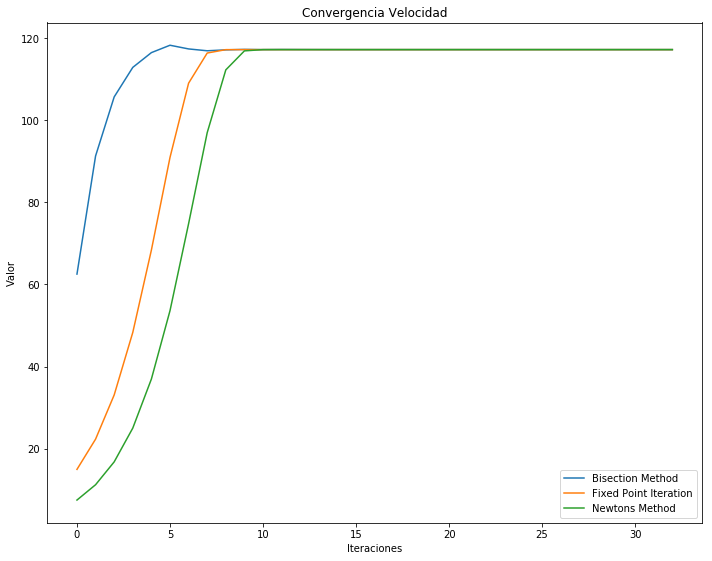

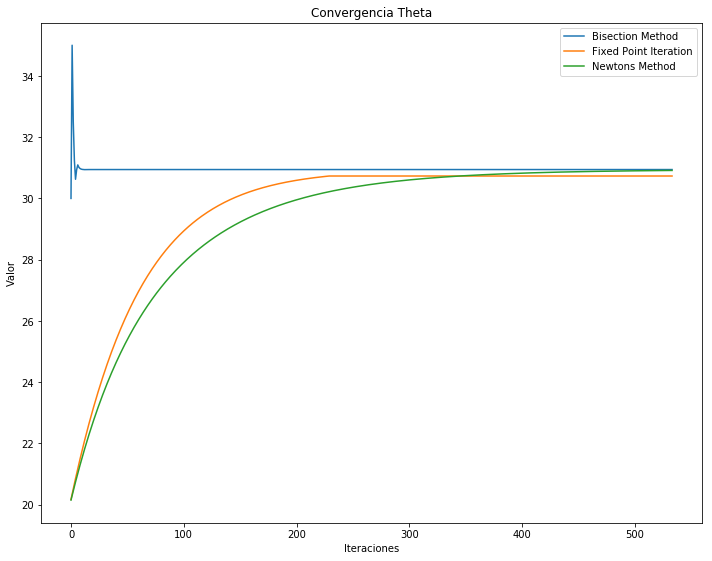

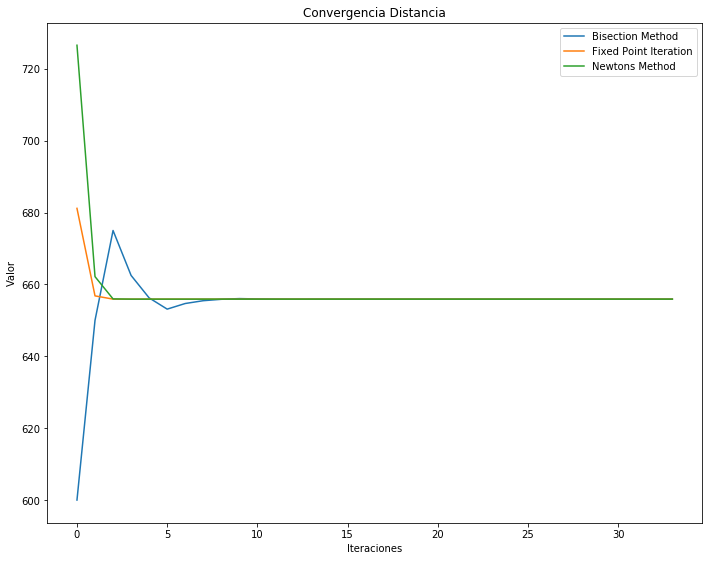

In [194]:
pasos = list(range(len(bl_fv)))
plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.plot(pasos, bl_fv, label='Bisection Method')
plot.plot(pasos, fpiv_gv, label='Fixed Point Iteration')
plot.plot(pasos, nmv_fv, label='Newtons Method')
plt.legend()
plt.title('Convergencia Velocidad')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

pasos = list(range(len(bl_ftheta)))
plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.plot(pasos, bl_ftheta, label='Bisection Method')
plot.plot(pasos, fpitheta_gtheta, label='Fixed Point Iteration')
plot.plot(pasos, nmtheta_ftheta, label='Newtons Method')
plt.legend()
plt.title('Convergencia Theta')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

pasos = list(range(len(bl_fd)))
plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.plot(pasos, bl_fd, label='Bisection Method')
plot.plot(pasos, fpid_gd, label='Fixed Point Iteration')
plot.plot(pasos, nmd_fd, label='Newtons Method')
plt.legend()
plt.title('Convergencia Distancia')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

In [195]:
v_teorico = 117.139
theta_teorico = 30.94
d_teorico = 655.90

fix_len(bl_fv,fpiv_gv,nmv_fv)
fix_len(bl_ftheta,fpitheta_gtheta,nmtheta_ftheta)
fix_len(bl_fd,fpid_gd,nmd_fd)

minus_teorico(v_teorico,bl_fv,fpiv_gv,nmv_fv)
minus_teorico(theta_teorico,bl_ftheta,fpitheta_gtheta,nmtheta_ftheta)
minus_teorico(d_teorico,bl_fd,fpid_gd,nmd_fd)

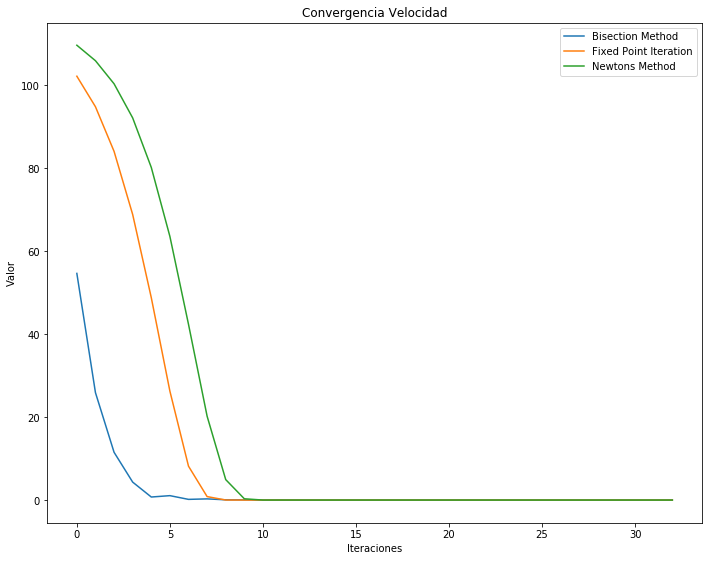

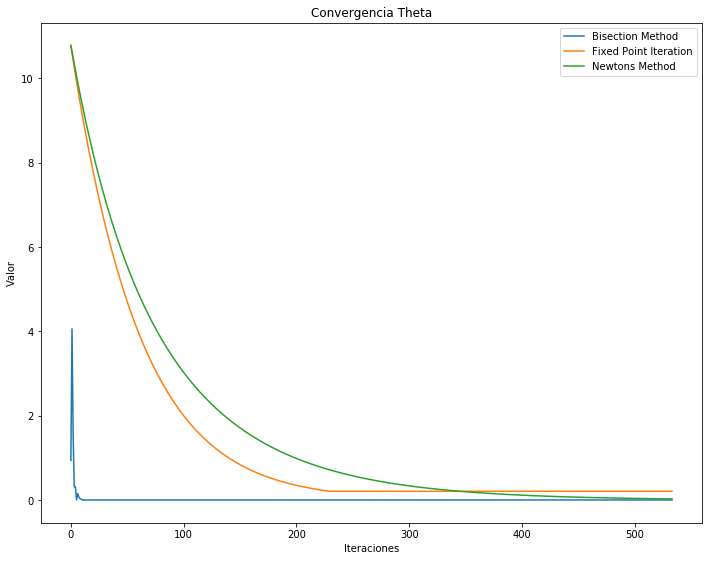

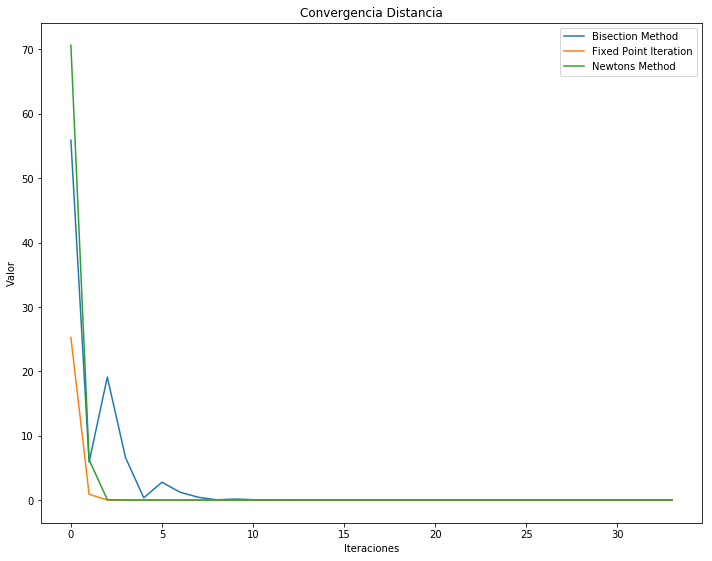

In [196]:
pasos = list(range(len(bl_fv)))
plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.plot(pasos, bl_fv, label='Bisection Method')
plot.plot(pasos, fpiv_gv, label='Fixed Point Iteration')
plot.plot(pasos, nmv_fv, label='Newtons Method')
plt.legend()
plt.title('Convergencia Velocidad')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

pasos = list(range(len(bl_ftheta)))
plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.plot(pasos, bl_ftheta, label='Bisection Method')
plot.plot(pasos, fpitheta_gtheta, label='Fixed Point Iteration')
plot.plot(pasos, nmtheta_ftheta, label='Newtons Method')
plt.legend()
plt.title('Convergencia Theta')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

pasos = list(range(len(bl_fd)))
plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.plot(pasos, bl_fd, label='Bisection Method')
plot.plot(pasos, fpid_gd, label='Fixed Point Iteration')
plot.plot(pasos, nmd_fd, label='Newtons Method')
plt.legend()
plt.title('Convergencia Distancia')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

b) Muestre con un _widget_ la trayectoria del proyectil a través del tiempo. 

In [303]:
from ipywidgets import interact
def plot_tratectory1(t=(0,8.1666)): 
    x = lambda t: 117*np.cos(np.deg2rad(20))*t
    y = lambda t: (117*np.sin(np.deg2rad(20))*t)-0.5*9.8*(t**2)
    ls = np.linspace(0,8.1666,1000)
    plt.figure(figsize=(8,8))
    plt.plot(x(ls),y(ls),'b-')
    plt.grid()
    plt.ylabel('y',fontsize=16)
    plt.xlabel('x',fontsize=16)
    plt.title('Trayectoria Usando theta = 20 y v = 117',fontsize=16)
    plt.plot(x(t),y(t),'k.',markersize=25)
    plt.show()
    
def plot_tratectory2(t=(0,10.52)): 
    x = lambda t: 100*np.cos(np.deg2rad(31))*t
    y = lambda t: (100*np.sin(np.deg2rad(31))*t)-0.5*9.8*(t**2)
    ls = np.linspace(0,10.52,1000)
    plt.figure(figsize=(8,8))
    plt.plot(x(ls),y(ls),'b-')
    plt.grid()
    plt.ylabel('y',fontsize=16)
    plt.xlabel('x',fontsize=16)
    plt.title('Trayectoria Usando theta = 31 y v = 100',fontsize=16)
    plt.plot(x(t),y(t),'k.',markersize=25)
    plt.show()
    
def plot_tratectory3(t=(0,6.98)): 
    x = lambda t: 100*np.cos(np.deg2rad(20))*t
    y = lambda t: (100*np.sin(np.deg2rad(20))*t)-0.5*9.8*(t**2)
    ls = np.linspace(0,6.98,1000)
    plt.figure(figsize=(8,8))
    plt.plot(x(ls),y(ls),'b-')
    plt.grid()
    plt.ylabel('y',fontsize=16)
    plt.xlabel('x',fontsize=16)
    plt.title('Trayectoria Usando theta = 20 y v = 100',fontsize=16)
    plt.plot(x(t),y(t),'k.',markersize=25)
    plt.show()
    

interact(plot_tratectory1,t=(0,8.1666,0.001))
interact(plot_tratectory2,t=(0,10.52,0.001))
interact(plot_tratectory3,t=(0,6.98,0.001))

interactive(children=(FloatSlider(value=4.083, description='t', max=8.1666, step=0.001), Output()), _dom_classes=('widget-interact',))

interactive(children=(FloatSlider(value=5.26, description='t', max=10.52, step=0.001), Output()), _dom_classes=('widget-interact',))

interactive(children=(FloatSlider(value=3.49, description='t', max=6.98, step=0.001), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_tratectory3>

## Pregunta 3  [60 puntos]

La tierra esta bajo ataque, seres de otra galaxia han venido para apoderarse de la tierra y esclavizar la humanidad. Los aliens se hacen llamar los singulares y han colocado una nave nodriza que genera un escudo que divide la tierra en dos, de esta manera las fuerzas que pelean en un frente no pueden recibir apoyo del otro. Unos físicos se dieron cuenta que el escudo tiene una debilidad, un pequeño agujero que se encuentra entre $\alpha$ y $\beta$ metros de altura sobre el nivel del mar, es por esto que se realizará una ofensiva con projectiles de largo alcance que serán lanzados por un buque de guerra. Para que el ataque tenga éxito se necesita conocer el ángulo y la velocidad que debe ser lanzado el projectil para que este impacte a la nave alienígena, como usted tiene conocimientos sobre algoritmos de búsqueda de ceros se le pide que encuentre los distintos parámetros que harán que la misión sea un éxito. Usted dispone de la siguiente información:


* El buque de guerra se encuentra a $x_b$ metros de la barrera y $x_0$ de la nave (eje $x$).
* La nave se encuentra a una altura de $y_0$ metros (eje $y$).
* El buque se encuentra en el origen de su sistema de coordenadas.
* La velocidad máxima a la que se pueden lanzar los misiles son de $v \left[\dfrac{m}{s}\right]$.
* Aproxime la gravedad a $9.8 \left[\dfrac{m}{s^2}\right]$

<a id='example'></a>
![title](example.png)

Encuentre la velocidad, el ángulo y el tiempo en el cual se logra impactar al ovni en el menor tiempo posible. Utilice la siguientre estructura:

```python
'''
Input: 
ovni_location - (2D-array) List with the functions to modelate x and y coordinates of the O.V.N.I. as a function of time. 
barrier_coordinates - (3D-array) Array with the x position of the barrier and the range of the hole. 

Output:
best_angle - (double) The best angle for the projectile to impact the O.V.N.I in the less time possible.
best_speed - (double) The best speed for the projectile to impact the O.V.N.I in the less time possible.
time_of_collision - (double) Time of collision.
'''

def shoot_projectile(ovni_location, barrier_coordinates):
    ...
    return [best_angle, best_speed, time_of_collision]
```
Las entradas de su función son las siguientes:
   * *ovni_location*: Una lista de funciones para modelar el movimiento del ovni. Por ejemplo [$x_0 + \cos(t), y_0 + \sin(t)$] o [$x_0 , y_0 + \sin(t)$].
   * *barrier_coordinates*: Un arreglo donde el primer elemento es la posición en el eje $x$ de la barrera, y la segunda y tercera posición son el rango donde se encuentra la debilidad del escudo. La estructura de su arreglo debe ser $[x_b, \alpha, \beta]$
   * Nota: en caso de no encontrar una solución, su algoritmo debe retornar [-1,-1,-1].
   
Un ejemplo de estos *inputs* se encuentra en la siguiente celda:

In [197]:
#Examples Values
x0 = 5000
y0 = 8000
x_ovni = lambda t: x0 + np.cos(t)
y_ovni = lambda t: y0 + np.sin(t)
#Examples Input 
ovni_position = [x_ovni, y_ovni]
barrier_coordinates = np.array([4000, 7500, 7600])

Puede usar la siguiente función para gráficar la trayectoria del proyectil:

In [198]:
def plotImage(xData, yData, im, ax):
    for x, y in zip(xData, yData):
        bb = Bbox.from_bounds(x,y,300,600)  
        bb2 = TransformedBbox(bb,ax.transData)
        bbox_image = BboxImage(bb2,
                            norm = None,
                            origin=None,
                            clip_on=False)

        bbox_image.set_data(im)
        ax.add_artist(bbox_image)

def projectile_trayectory(ovni_position, barrier_coordinates, steps, k=0):
    g = 9.8
    #Missile trayectory
    y_ec = lambda t ,speed, theta: speed*np.sin(theta)*t - 0.5*g*t**2
    x_ec = lambda t ,speed, theta: speed*np.cos(theta)*t
    ############################################################################
    #You have to found the best angle and speed for the input with your function
    ############################################################################
    # [best_angle, best_speed, time_of_collision] = shoot_projectile(ovni_location, barrier_coordinates)
    # Since we don't have the function implemented yet, we will use the following values:
    best_angle = np.pi/3; 
    best_speed = 600; 
    best_time = 10
    #######################
    x_ovni = ovni_position[0]
    y_ovni = ovni_position[1]
    t_distance = np.linspace(0, best_time, steps)
    fig = plt.figure(figsize=(17,8))
    ax = fig.add_subplot(111)
    plt.xlabel(r"$x$ [m]",fontsize = 20) 
    plt.ylabel(r"$y$ [m]",fontsize = 20)
    blueX = [x_ovni(x0)]
    blueY = [y_ovni(y0)] 
    x_barrier = [barrier_coordinates[0]]*100
    y_1_barrier = np.linspace(0,barrier_coordinates[1],100)
    y_2_barrier = np.linspace(barrier_coordinates[2],barrier_coordinates[1]+10000,100)
    plt.plot(x_barrier,y_1_barrier,x_barrier,y_2_barrier,color='blue')
    ax.set_ylim(0,9000)
    ax.set_xlim(0,8000)
    plt.title("Space Invaders", fontsize = 20)
    plt.grid()
    explosion = True
    if(x_ec(t_distance[k],best_speed,best_angle) >= barrier_coordinates[0]):
        aux = y_ec(t_distance[:k],best_speed,best_angle)[y_ec(t_distance[:k],best_speed,best_angle) > barrier_coordinates[1]]
        aux = aux[aux < barrier_coordinates[2]]
        if(len(aux) > 0):
            ax.plot(x_ec(t_distance[:k],best_speed,best_angle),y_ec(t_distance[:k],best_speed,best_angle),'k--')
        else:
            aux = x_ec(t_distance[:k],best_speed,best_angle)[x_ec(t_distance[:k],best_speed,best_angle) < barrier_coordinates[0]]
            ax.plot(aux, y_ec(t_distance[:len(aux)],best_speed,best_angle),'k--')
            explosion = False
    else:
        explosion = False
        ax.plot(x_ec(t_distance[:k],best_speed,best_angle),y_ec(t_distance[:k],best_speed,best_angle),'k--')
    if k == len(t_distance)-1 and explosion:
        blueX = [x_ovni(k)-100]
        blueY = [y_ovni(k)+100]
        blueMarker = plt.imread('boom.png')
        plotImage(blueX, blueY, blueMarker,ax)
        print("Impact!.")
    else: 
        blueMarker = plt.imread('OVNI.png')
        plotImage(blueX, blueY, blueMarker,ax)
    plt.show()
    
steps = 100
widgets.interact(projectile_trayectory,k=(0,steps-1,1),
                 ovni_position = fixed(ovni_position), 
                 barrier_coordinates = fixed(barrier_coordinates),
                 steps = fixed(steps))

interactive(children=(IntSlider(value=0, description='k', max=99), Output()), _dom_classes=('widget-interact',))

<function __main__.projectile_trayectory>

Usted es libre de modificar el código de la función *projectile_trayectory*, pero el gráfico a mostrar debe verse reflejado como [la figura de ejemplo](#example).

# Instrucciones:

* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter Notebook` (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados.
* El archivo de entrega debe denominarse Tarea2-rol.tar.gz y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados, nombre y rol del estudiante. El _notebook_ debe tener como nombre Tarea2-rol.ipynb.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* Debe citar toda fuente de código externo. 
* El trabajo es personal, no se permite compartir código ni utilizar código de otros, aunque sí se sugiere discutir aspectos generales con sus compañeros.
* En caso de sospecha de no cumplimiento de estas instrucciones, se solicitará al involucrado o la involucrada a aclarar la situación. Dependiendo de la justificación se decidirá su calificación, la cual podrá o no ser penalizada.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.